In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv("Data/car data.csv")

In [3]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

In [5]:
categorical_features = ["Car_Name", "Fuel_Type", "Seller_Type", "Transmission", "Owner"]

In [6]:
for categorical_feature in categorical_features:
    print(categorical_feature)
    print(df[categorical_feature].unique())
    print("-----------------------------------------------------------------------------")

Car_Name
['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 'TVS Sport ' 'Honda Dream Yuga '
 'Bajaj Avenger Street 220' 'He

In [7]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
for column in df.columns:
    print(df[column].value_counts().reset_index().head(3))
    print("-----------------------------------------------")

        Car_Name  count
0           city     26
1  corolla altis     16
2          verna     14
-----------------------------------------------
   Year  count
0  2015     61
1  2016     50
2  2014     38
-----------------------------------------------
   Selling_Price  count
0           0.45      8
1           0.60      8
2           5.25      7
-----------------------------------------------
   Present_Price  count
0            9.4     15
1           13.6     13
2            5.7      8
-----------------------------------------------
   Kms_Driven  count
0       45000      9
1       15000      9
2       40000      5
-----------------------------------------------
  Fuel_Type  count
0    Petrol    239
1    Diesel     60
2       CNG      2
-----------------------------------------------
  Seller_Type  count
0      Dealer    195
1  Individual    106
-----------------------------------------------
  Transmission  count
0       Manual    261
1    Automatic     40
---------------------------

In [9]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [10]:
df.drop("Car_Name", axis = 1, inplace = True)

In [11]:
df["Current_Year"] = 2023

In [12]:
df["Car_Age"] = df["Current_Year"] - df["Year"]

In [13]:
df.drop(["Year", "Current_Year"], axis = 1, inplace = True)

In [14]:
df = pd.get_dummies(df, dtype = "int", drop_first = True)

In [15]:
df

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,0,1,0,1
1,4.75,9.54,43000,0,10,1,0,0,1
2,7.25,9.85,6900,0,6,0,1,0,1
3,2.85,4.15,5200,0,12,0,1,0,1
4,4.60,6.87,42450,0,9,1,0,0,1
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,7,1,0,0,1
297,4.00,5.90,60000,0,8,0,1,0,1
298,3.35,11.00,87934,0,14,0,1,0,1
299,11.50,12.50,9000,0,6,1,0,0,1


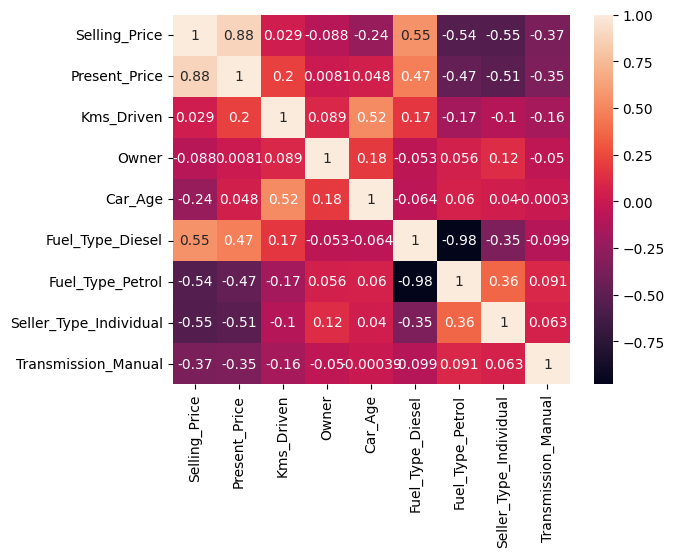

In [16]:
sns.heatmap(df.corr(), annot = True)
plt.show()

In [17]:
X = df.drop("Selling_Price", axis = 1)
y = df["Selling_Price"]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [19]:
X_train

,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
184,0.750,26000,1,15,0,1,1,1
132,0.950,3500,0,6,0,1,1,1
194,0.787,50000,0,15,0,1,1,1
75,6.800,36000,0,8,0,1,0,1
111,1.500,8700,0,7,0,1,1,1
...,...,...,...,...,...,...,...,...
188,0.570,18000,0,10,0,1,1,1
71,12.480,45000,0,12,1,0,0,1
106,3.450,16500,1,9,0,1,1,1
270,10.000,69341,0,12,0,1,0,1


### This is regression problem, so you can use ExtraTreeRegressor to find the import of each feature and fit X and y

In [20]:
etr_model = ExtraTreesRegressor()
etr_model.fit(X, y)

ExtraTreesRegressor()

<Axes: >

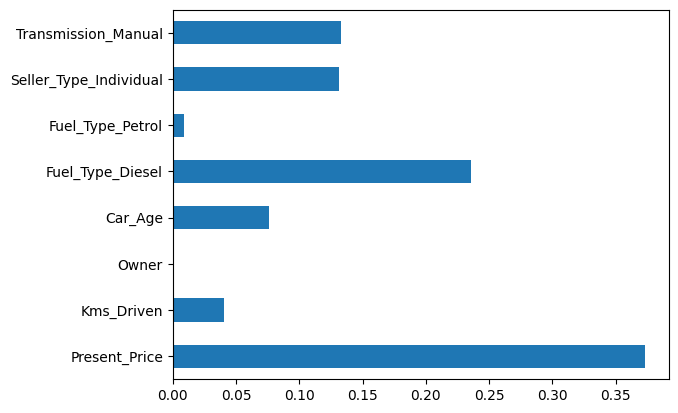

In [21]:
importance = pd.Series(etr_model.feature_importances_, index = X.columns)
importance.plot(kind = "barh")

## There are two types from which we can tune the hyperparameters
- GridSearchCV: use when the number of parameters is small
- RandomizedSearchCV: use when the number of parameters is big 

# Using RandomizedSeachCV to choose the best parameters for your model

### 1 - Define the model

In [22]:
rfr_model = RandomForestRegressor()

### 2 -  Define the hyperparameter search space

In [23]:
param_dist = {
    "n_estimators": [i for i in range(10, 201)],
    "max_features": ['auto', 'sqrt', 'log2'],
    "max_depth": [i for i in range(5, 51)],
    "min_samples_split": [i for i in range(2, 21)],
    "min_samples_leaf": [i for i in range(2, 21)],
    "bootstrap": [True, False]
}

### 3 - Create the RandomizedSearchCV object

In [24]:
random_search = RandomizedSearchCV(
    rfr_model,
    param_distributions = param_dist,
    n_iter = 10,
    cv = 5,
    scoring = "neg_mean_squared_error",
    random_state = 42,
    verbose = 2
)

<IPython.core.display.Javascript object>

### 4 - Fit your X_trian, y_train to your random_search model

In [25]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END bootstrap=False, max_depth=36, max_features=log2, min_samples_leaf=9, min_samples_split=20, n_estimators=64; total time=   0.0s
[CV] END bootstrap=False, max_depth=36, max_features=log2, min_samples_leaf=9, min_samples_split=20, n_estimators=64; total time=   0.0s
[CV] END bootstrap=False, max_depth=36, max_features=log2, min_samples_leaf=9, min_samples_split=20, n_estimators=64; total time=   0.0s
[CV] END bootstrap=False, max_depth=36, max_features=log2, min_samples_leaf=9, min_samples_split=20, n_estimators=64; total time=   0.0s
[CV] END bootstrap=False, max_depth=36, max_features=log2, min_samples_leaf=9, min_samples_split=20, n_estimators=64; total time=   0.0s
[CV] END bootstrap=False, max_depth=23, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=110; total time=   0.0s
[CV] END bootstrap=False, max_depth=23, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=110;

C:\Users\razan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\razan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\razan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\razan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py",

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 6, 7, 8, 9, 10, 11, 12,
                                                      13, 14, 15, 16, 17, 18,
                                                      19, 20, 21, 22, 23, 24,
                                                      25, 26, 27, 28, 29, 30,
                                                      31, 32, 33, 34, ...],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [2, 3, 4, 5, 6, 7,
                                                             8, 9, 10, 11, 12,
                                                             13, 14, 15, 16, 17,
                                                             18, 19, 20],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10, 11, 12,
                                                              13, 14, 15, 16,
                                                              17, 18, 19, 20],
                                        'n_estimators': [10, 11, 12, 13, 14, 15,
                                                         16, 17, 18, 19, 20, 21,
                                                         22, 23, 24, 25, 26, 27,
                                                         28, 29, 30, 31, 32, 33,
                                                         34, 35, 36, 37, 38, 39, ...]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

### 5 -  Print the best parameters

In [26]:
best_params = random_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'n_estimators': 110, 'min_samples_split': 3, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 23, 'bootstrap': False}


### 6 - Predict the test data and check for the accuracy

In [27]:
y_pred = random_search.predict(X_test)

In [28]:
y_pred

array([ 1.2566069 ,  9.02025016,  6.04499676,  0.73947108,  5.77256663,
        6.91567644,  1.08395109,  0.77748854,  0.77713892,  6.57140019,
        9.51935508,  1.05755146,  7.35088317,  1.18285866,  6.21921938,
        3.25465104,  1.15117909,  8.90904688,  1.06016434,  1.40790959,
        0.78089806,  9.76351177,  6.93025934,  3.06617794,  0.69742597,
        3.82013037,  4.8782794 ,  3.54297657,  1.41832047,  1.15663031,
        0.82795379,  8.97681169,  0.63615901,  3.33276403,  8.61489861,
        4.33923977,  5.15711144,  5.04671893,  3.22386029,  5.32894382,
        4.45585685,  4.57704671,  4.56646785,  0.76559808,  7.55473695,
        0.7700868 ,  6.09546363,  5.28344131,  3.21869482,  5.6085353 ,
        5.08697132,  1.3242792 , 20.15415735, 20.56667544,  6.82729711,
        8.17620583,  5.07554343,  9.74426806,  3.31546029,  7.10686836,
        0.55961825])

In [29]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Absolute Error: 0.8295194062824216
Mean Squared Error: 2.148834931538757
R-squared: 0.9067167177960682


### Here we can see that our model is 90.7 % accurate

In [30]:
y_actual = np.array(y_test)
y_preds = np.array(y_pred)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

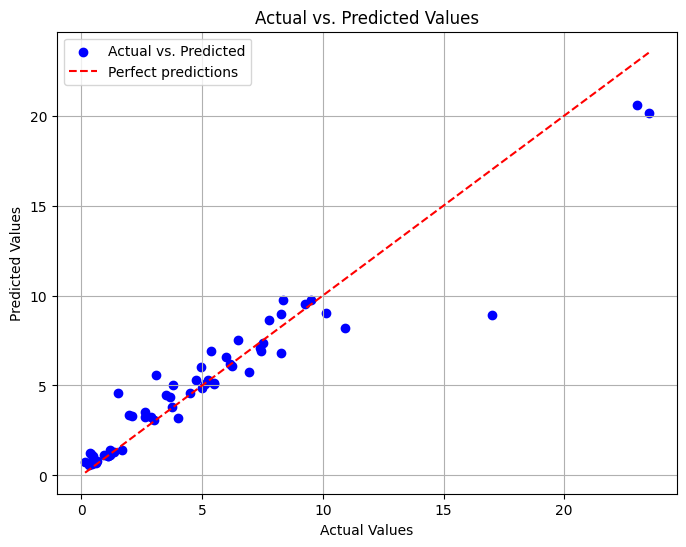

In [31]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 6))
plt.scatter(y_actual, y_preds, color='blue', label='Actual vs. Predicted')
plt.plot([min(y_actual), max(y_actual)], [min(y_actual), max(y_actual)], linestyle='--', color='red', label='Perfect predictions')

plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

In [32]:
import pickle

# open a file, where you want to store the data
file = open("random_forest_regression_model.pkl", "wb")

# dump information to that file; 1st parameter is the model and the second one is the file
pickle.dump(random_search, file)